DATA CLEANING WITH MEAN FOR DATA SET


In [8]:
import pandas as pd

# Load the dataset, specifying the encoding
file_path = "/content/PoliceKillingsUS.csv"  # Replace with your dataset file path
data = pd.read_csv(file_path, encoding='latin-1') # Or 'cp1252', 'ISO-8859-1', etc.

# Display initial information about the dataset
print("Initial Data Information:")
print(data.info())

# Replace missing values with mean for numerical columns
data_filled = data.copy()
numeric_columns = data_filled.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    mean_value = data_filled[column].mean()
    data_filled[column].fillna(mean_value, inplace=True)

# Verify if missing values are replaced
print("\nMissing Values After Replacement:")
print(data_filled.isnull().sum())

# Save the cleaned dataset
cleaned_file_path = "Cleaned_PoliceKillingsUS.csv"
data_filled.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")

Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dty

<ipython-input-8-5d1aa0f94ec8>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_filled[column].fillna(mean_value, inplace=True)


CORRELATION MATRIX
AND
CORRELATION HEATMAP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

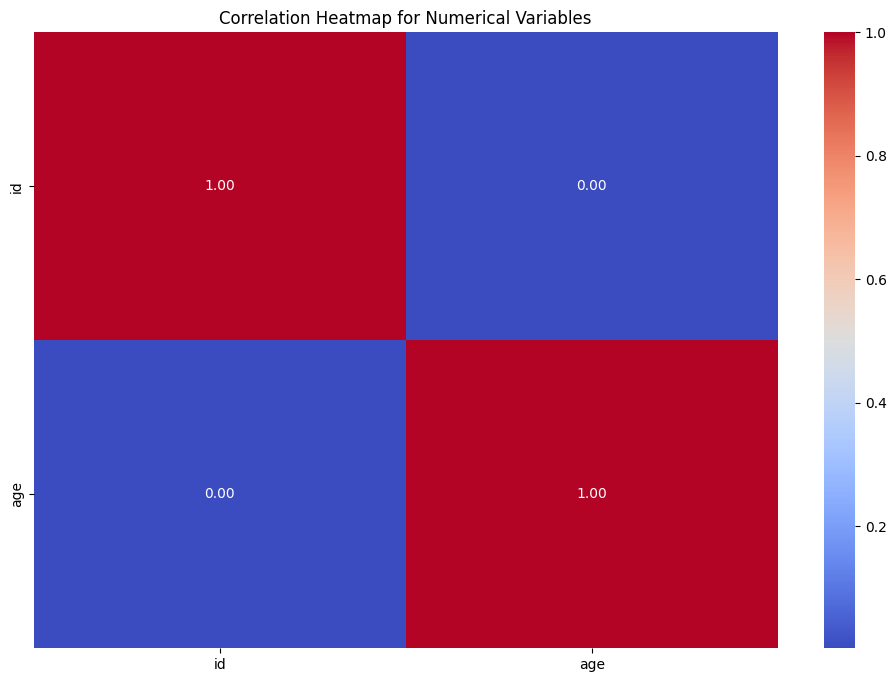


Variables with strong associations (correlation ≥ 0.5):
Empty DataFrame
Columns: []
Index: []

Top Correlated Pairs:
Series([], dtype: float64)


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset, specifying the encoding to 'latin-1'
file_path = '/content/PoliceKillingsUS.csv'
data = pd.read_csv(file_path, encoding='latin-1') # This line is changed

# Display basic information about the dataset
data.info()

# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

# Display correlation heatmap for numerical variables
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

# Identify potentially associated variables based on correlation threshold
correlation_threshold = 0.5
strongly_correlated = correlation_matrix[(correlation_matrix >= correlation_threshold) & (correlation_matrix != 1)]

print("\nVariables with strong associations (correlation ≥ 0.5):")
print(strongly_correlated.dropna(how='all', axis=0).dropna(how='all', axis=1))

# Explore relationships for a pair of strongly correlated variables (if any exist)
if not strongly_correlated.empty:
    correlated_pairs = strongly_correlated.unstack().dropna()
    correlated_pairs = correlated_pairs[correlated_pairs > correlation_threshold].sort_values(ascending=False)
    print("\nTop Correlated Pairs:")
    print(correlated_pairs.head())
else:
    print("\nNo strongly correlated variable pairs found.")

CORRELATION MATRIX


In [15]:
import pandas as pd

# Load the dataset
file_path = '/content/Cleaned_PoliceKillingsUS.csv'
data = pd.read_csv(file_path)

# Preview the dataset to understand its structure
print("Dataset Columns:")
print(data.columns)

# Check for correlations (numeric variables only)
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Optionally, save the correlation matrix to a CSV file for review
correlation_matrix.to_csv('/content/Cleaned_PoliceKillingsUS.csv')

correlation_matrix.head()

Dataset Columns:
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

Correlation Matrix:
           id       age
id   1.000000  0.001899
age  0.001899  1.000000


,id,age
id,1.000000,0.001899
age,0.001899,1.000000


Bar chart of the 'race' column

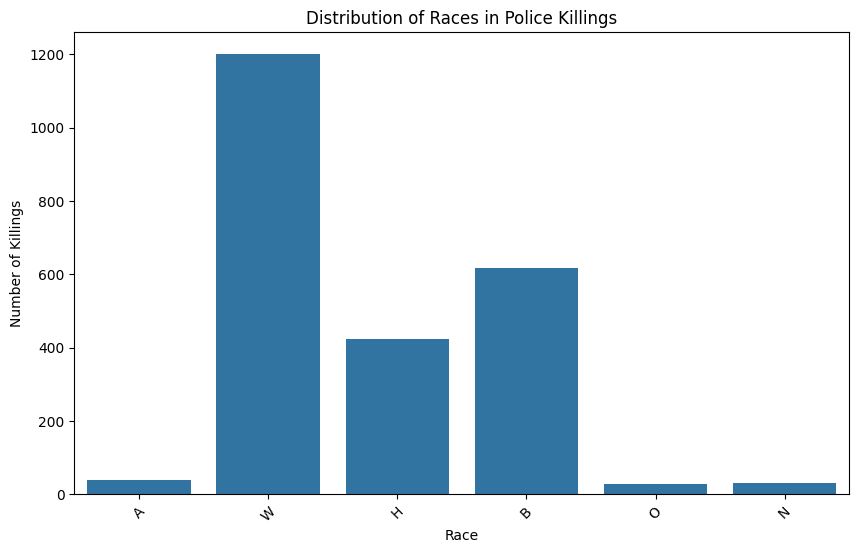

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset, specifying the encoding to 'latin-1'
file_path = '/content/PoliceKillingsUS.csv'
data = pd.read_csv(file_path, encoding='latin-1') # This line is changed

# Example: Bar chart of the 'race' column
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=data)
plt.title('Distribution of Races in Police Killings')
plt.xlabel('Race')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Bar chart of 'gender' column

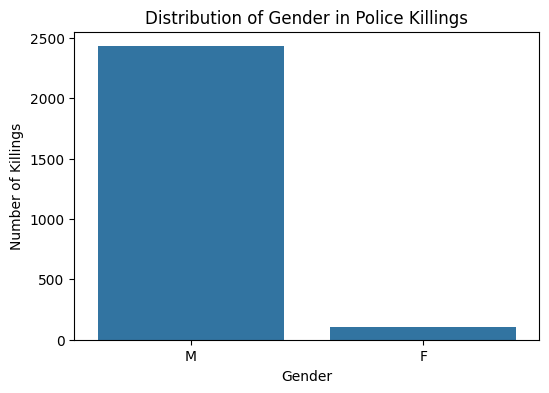

In [23]:
# Bar chart of 'gender' column
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender in Police Killings')
plt.xlabel('Gender')
plt.ylabel('Number of Killings')
plt.show()

Bar chart of 'signs_of_mental_illness'

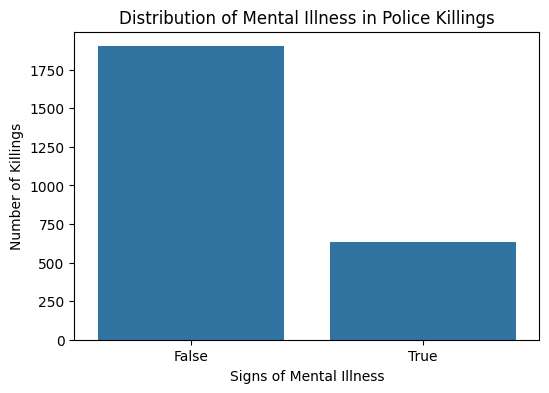

In [25]:
# Bar chart of 'signs_of_mental_illness'
plt.figure(figsize=(6, 4))
sns.countplot(x='signs_of_mental_illness', data=data)
plt.title('Distribution of Mental Illness in Police Killings')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Number of Killings')
plt.show()

Column chart of the 'race' column

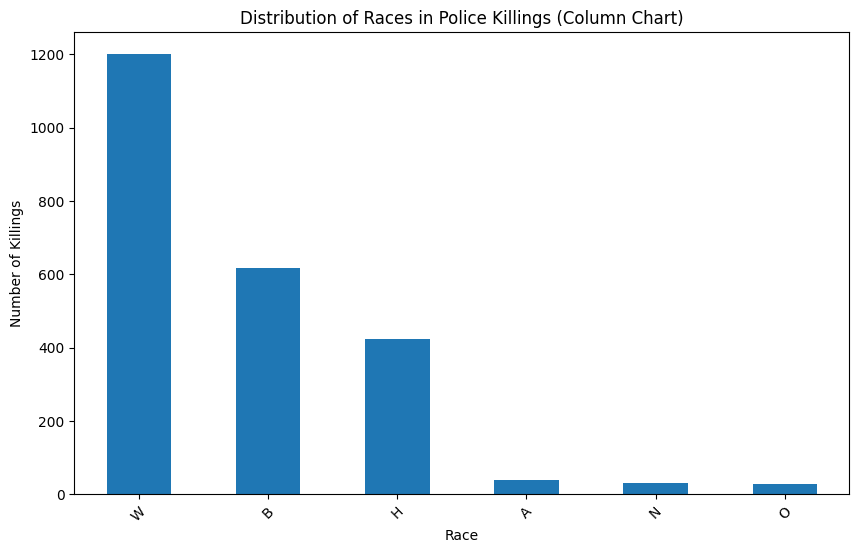

In [27]:
# prompt: Column Chart

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already loaded as in the previous code

# Example: Column chart of the 'race' column
plt.figure(figsize=(10, 6))
data['race'].value_counts().plot(kind='bar')
plt.title('Distribution of Races in Police Killings (Column Chart)')
plt.xlabel('Race')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Column chart of the 'gender' column

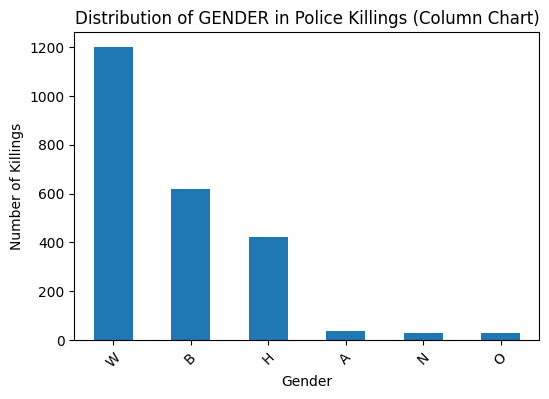

In [28]:
plt.figure(figsize=(6, 4))
data['race'].value_counts().plot(kind='bar')
plt.title('Distribution of GENDER in Police Killings (Column Chart)')
plt.xlabel('Gender')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

COLUMN chart of 'signs_of_mental_illness'

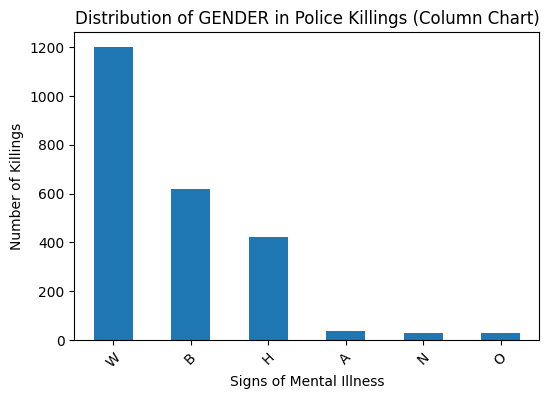

In [29]:
plt.figure(figsize=(6, 4))
data['race'].value_counts().plot(kind='bar')
plt.title('Distribution of GENDER in Police Killings (Column Chart)')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Number of Killings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

 Line chart of the number of killings over time

<ipython-input-30-300ecce48a7e>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


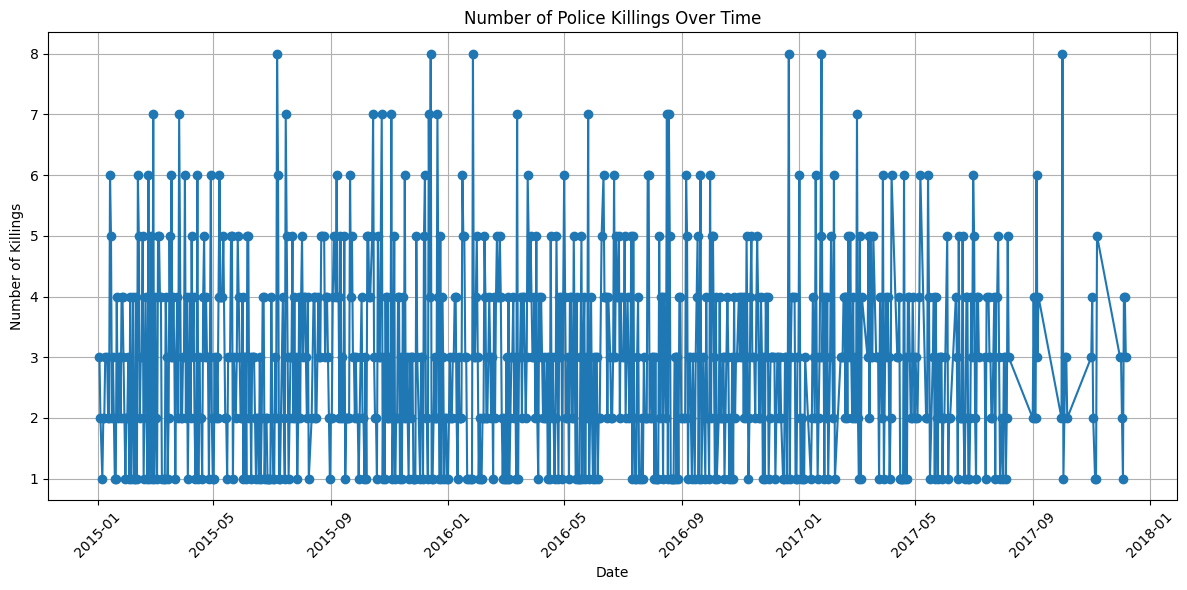

In [30]:

data['date'] = pd.to_datetime(data['date'])

# Group by date and count the number of killings
killings_by_date = data.groupby('date')['id'].count().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(killings_by_date['date'], killings_by_date['id'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Killings')
plt.title('Number of Police Killings Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Stacked Bar Chart: Number of killings by race and signs of mental illness

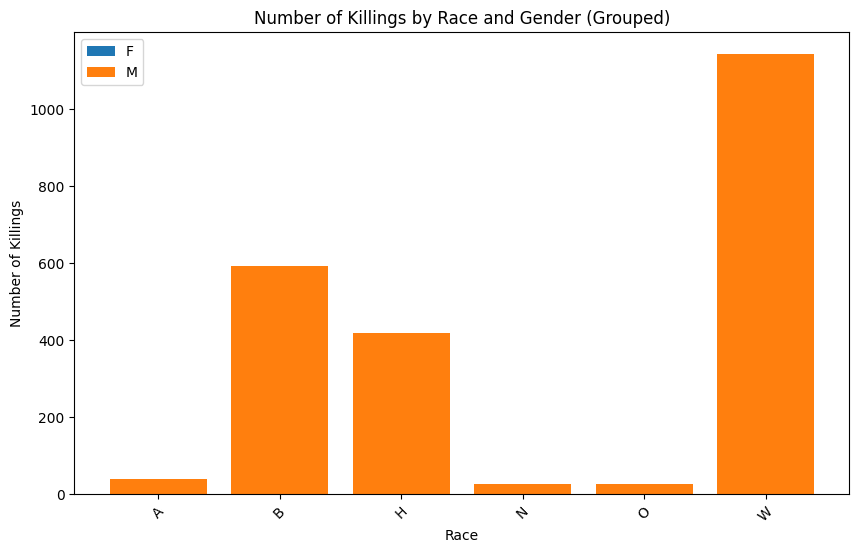

<Figure size 1000x600 with 0 Axes>

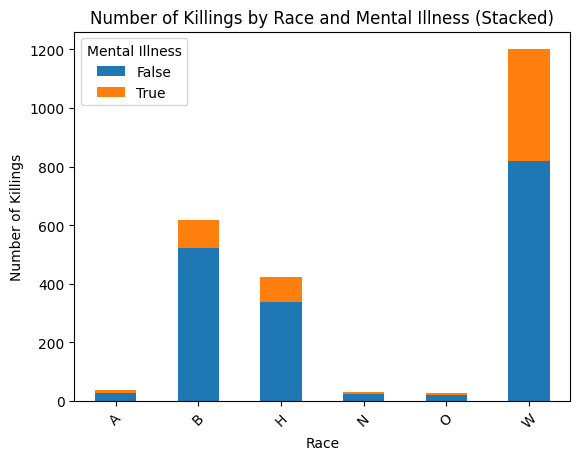

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


grouped_data = data.groupby(['race', 'gender'])['id'].count().reset_index()

plt.figure(figsize=(10, 6))
for gender in grouped_data['gender'].unique():
    subset = grouped_data[grouped_data['gender'] == gender]
    plt.bar(subset['race'], subset['id'], label=gender)

plt.xlabel('Race')
plt.ylabel('Number of Killings')
plt.title('Number of Killings by Race and Gender (Grouped)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


# Stacked Bar Chart: Number of killings by race and signs of mental illness
stacked_data = data.groupby(['race', 'signs_of_mental_illness'])['id'].count().unstack()

plt.figure(figsize=(10, 6))
stacked_data.plot(kind='bar', stacked=True)

plt.xlabel('Race')
plt.ylabel('Number of Killings')
plt.title('Number of Killings by Race and Mental Illness (Stacked)')
plt.legend(title='Mental Illness') # Add a title to the legend
plt.xticks(rotation=45)
plt.show()

Histogram

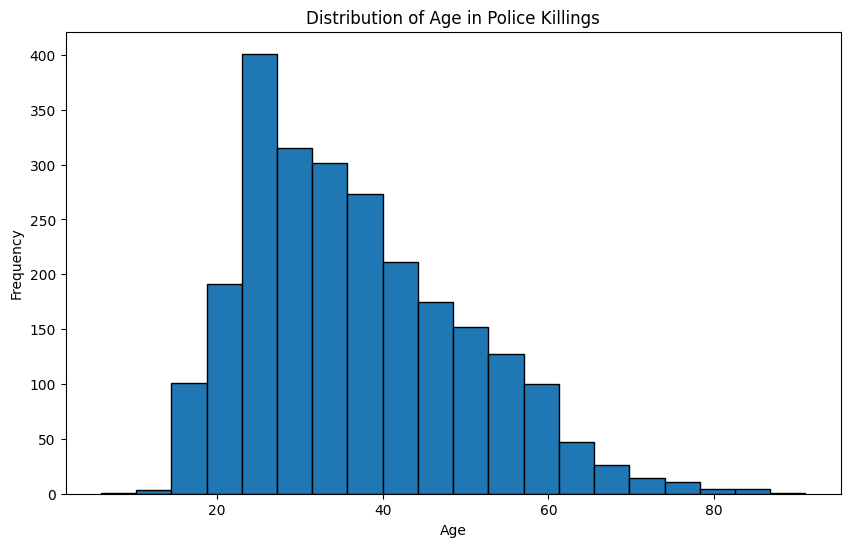

In [32]:
#Histogram VISULIZATION
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Police Killings')
plt.show()

Box Plot (or Whisker Plot):

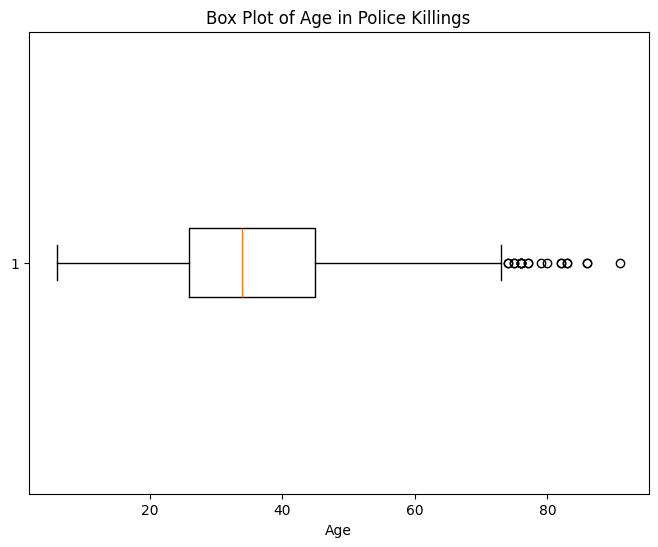

In [33]:
#Box Plot (or Whisker Plot):

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(data['age'].dropna(), vert=False)  # Use dropna() to handle potential NaN values
plt.xlabel('Age')
plt.title('Box Plot of Age in Police Killings')
plt.show()

Density Plot:

<ipython-input-34-192062b7318f>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['age'], shade=True)  # Use kdeplot for density plot


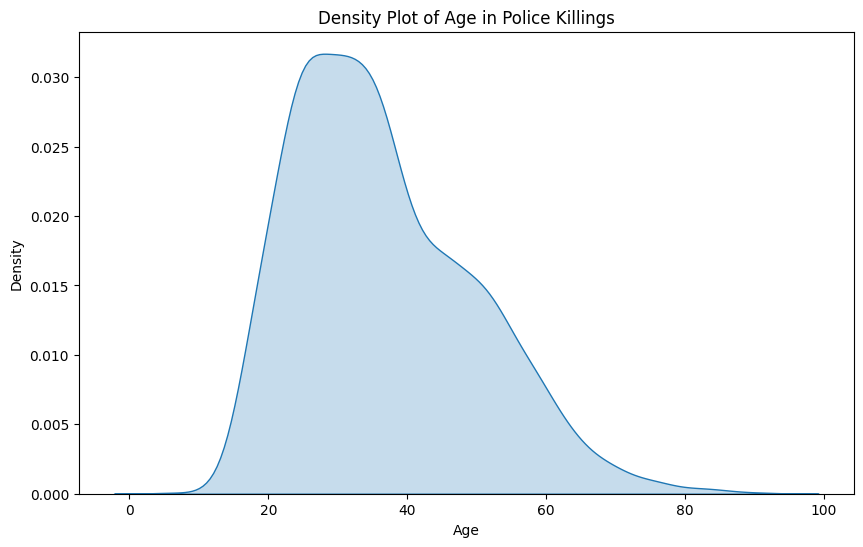

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Density Plot for 'age'
plt.figure(figsize=(10, 6))
sns.kdeplot(data['age'], shade=True)  # Use kdeplot for density plot
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age in Police Killings')
plt.show()

Scatter Plot:

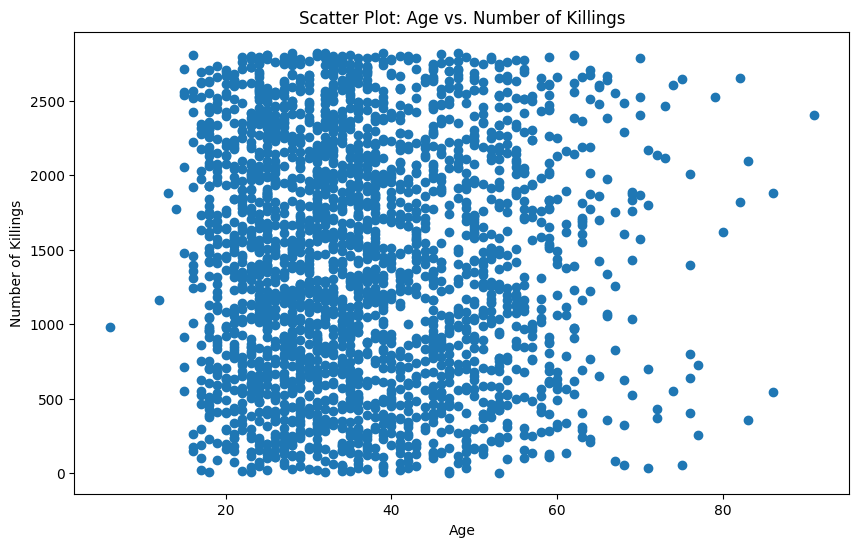

In [35]:
# Scatter Plot: Age vs. Number of Killings (example)
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['id']) # Replace 'id' with a relevant numerical column if needed
plt.xlabel('Age')
plt.ylabel('Number of Killings') # Replace with appropriate label
plt.title('Scatter Plot: Age vs. Number of Killings')
plt.show()

Bubble Chart

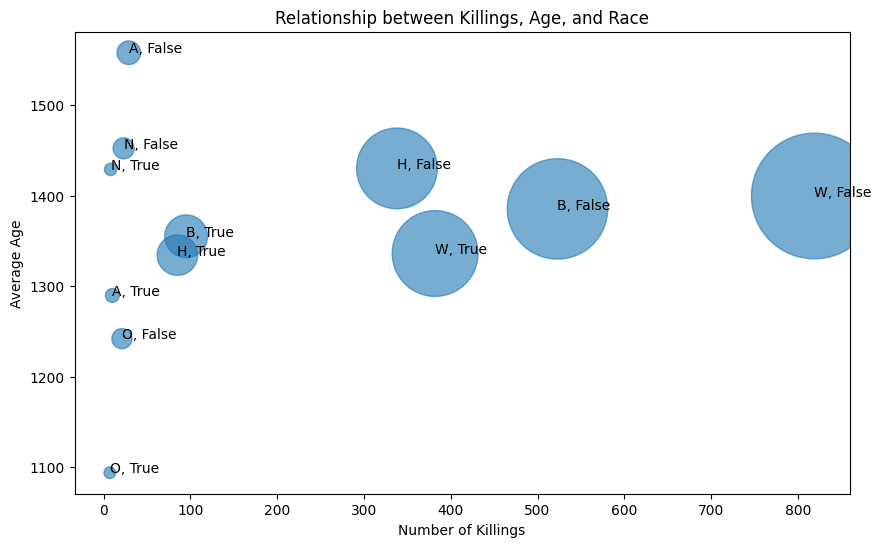

In [36]:


import matplotlib.pyplot as plt

# Group data by race and mental illness status, count killings, and get the average age
grouped_data = data.groupby(['race', 'signs_of_mental_illness'])['id'].agg(['count', 'mean'])
grouped_data = grouped_data.reset_index()
grouped_data.columns = ['race', 'mental_illness', 'killings', 'avg_age']

# Create the bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(grouped_data['killings'], grouped_data['avg_age'], s=grouped_data['killings']*10, alpha=0.6)

# Add labels and title
plt.xlabel('Number of Killings')
plt.ylabel('Average Age')
plt.title('Relationship between Killings, Age, and Race')

# Annotate points with race and mental illness status
for i in range(len(grouped_data)):
    plt.annotate(f"{grouped_data['race'][i]}, {grouped_data['mental_illness'][i]}",
                 (grouped_data['killings'][i], grouped_data['avg_age'][i]))
plt.show()

Heatmap

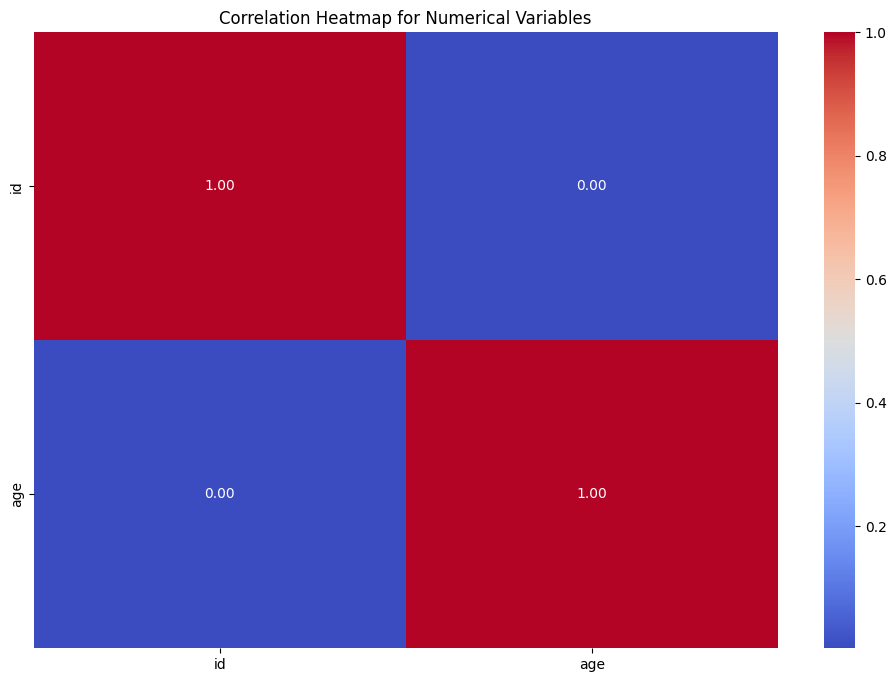

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

Pie Chart:

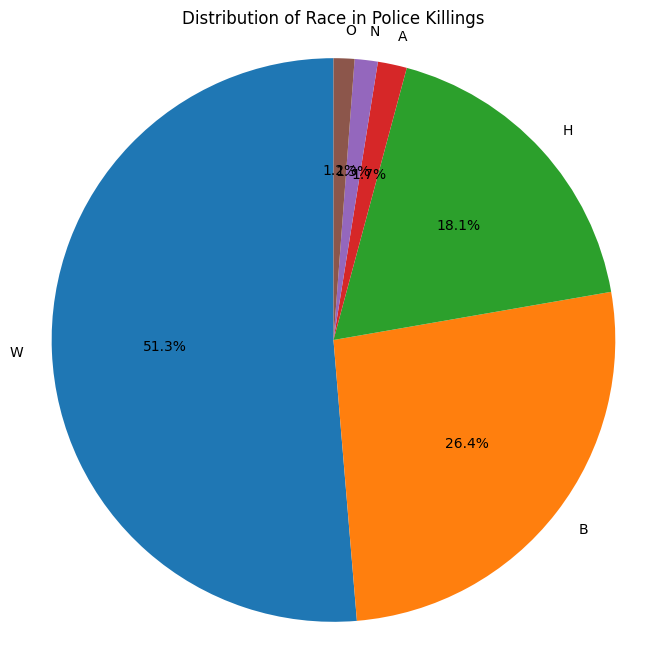

In [38]:


import matplotlib.pyplot as plt
# Pie Chart: Distribution of Race

race_counts = data['race'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Race in Police Killings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Donut Chart

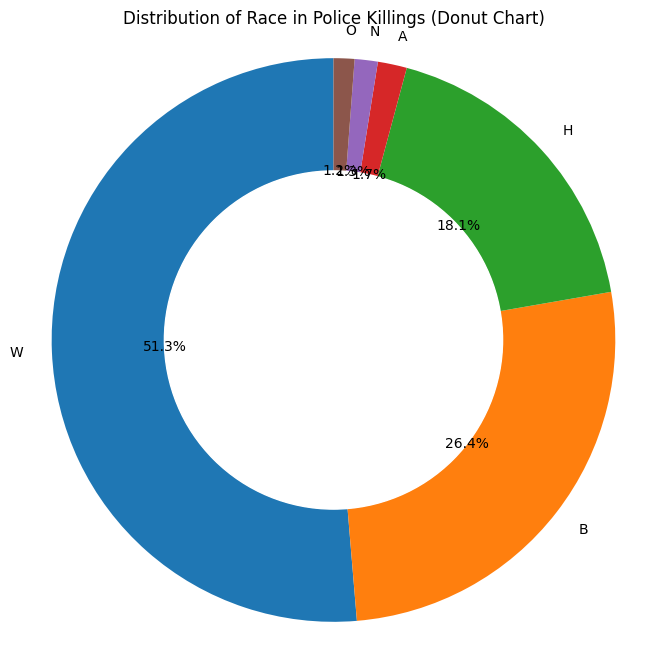

In [39]:


import matplotlib.pyplot as plt

# Assuming 'race_counts' is already calculated as in the Pie Chart example
race_counts = data['race'].value_counts()

# Donut Chart: Distribution of Race
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))  # Adjust 'width' for the donut hole size

# Add a white circle in the middle to create the donut effect
centre_circle = plt.Circle((0,0),0.6,color='white') # Adjust radius for the donut hole size
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Race in Police Killings (Donut Chart)')
plt.axis('equal')
plt.show()

Stacked Area Chart:

<Figure size 1200x600 with 0 Axes>

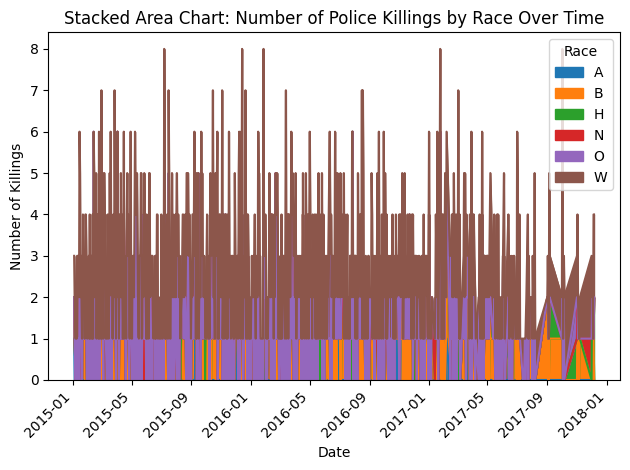

In [40]:


import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime objects if it's not already
data['date'] = pd.to_datetime(data['date'])

# Group data by date and race, then count the number of killings
killings_by_date_race = data.groupby(['date', 'race'])['id'].count().reset_index()

# Pivot the data to create a suitable format for the stacked area chart
pivot_data = killings_by_date_race.pivot(index='date', columns='race', values='id').fillna(0)


# Create the stacked area chart
plt.figure(figsize=(12, 6))
pivot_data.plot(kind='area', stacked=True)

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Number of Killings')
plt.title('Stacked Area Chart: Number of Police Killings by Race Over Time')
plt.xticks(rotation=45)
plt.legend(title='Race')
plt.tight_layout()
plt.show()

Treemap

In [43]:
import plotly.express as px

# Remove rows with missing values in 'race'
data_cleaned = data.dropna(subset=['race'])

# Create the treemap using the cleaned data
fig = px.treemap(data_cleaned, path=['race', 'gender'], values='id',
                  color='age', hover_data=['manner_of_death'],
                  color_continuous_scale='RdBu',
                  title='Treemap of Police Killings by Race and Gender')
fig.show()

Sunburst Chart

In [45]:
import plotly.express as px

# Remove rows with missing values in any of the columns used for the sunburst
data_cleaned = data.dropna(subset=['race', 'gender', 'signs_of_mental_illness'])

# Create the sunburst chart using the cleaned data
fig = px.sunburst(data_cleaned, path=['race', 'gender', 'signs_of_mental_illness'],
                  values='id',
                  color='age',
                  hover_data=['manner_of_death'],
                  color_continuous_scale='RdBu',
                  title='Sunburst Chart of Police Killings by Race, Gender, and Mental Illness')
fig.show()